In [1]:
import pandas as pd
import plotly.express as px


#reading the data file
car_df = pd.read_csv("data/car_data.csv")

#Make a list of what you want to drop
columns_to_drop = ['feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'engine_fuel', 'up_counter']

#Drop the columns using drop()
car_df.drop(columns_to_drop, axis=1, inplace = True) #axis = 1 lets pandas know we are dropping columns, not rows.

#replacing russian with english
car_df["location_region"].replace({"Минская обл.":"Minsk","Гомельская обл.":"Gomel", "Витебская обл.":"Vitebsk", "Брестская обл.":"Brest", "Могилевская обл.":"Mogilev", "Гродненская обл.":"Grodno"}, inplace=True)

In [2]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_has_gas     38531 non-null  bool   
 7   engine_type        38531 non-null  object 
 8   engine_capacity    38521 non-null  float64
 9   body_type          38531 non-null  object 
 10  has_warranty       38531 non-null  bool   
 11  state              38531 non-null  object 
 12  drivetrain         38531 non-null  object 
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  bool   
 15  location_region    38531 non-null  object 
 16  number_of_photos   385

In [3]:
car_df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_has_gas', 'engine_type',
       'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain',
       'price_usd', 'is_exchangeable', 'location_region', 'number_of_photos',
       'duration_listed'],
      dtype='object')

In [4]:
car_df.head(1)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,False,gasoline,2.5,universal,False,owned,all,10900.0,False,Minsk,9,16


In [5]:
car_df['manufacturer_name'].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [6]:
car_df['transmission'].value_counts()

mechanical    25633
automatic     12898
Name: transmission, dtype: int64

<AxesSubplot:ylabel='engine_type'>

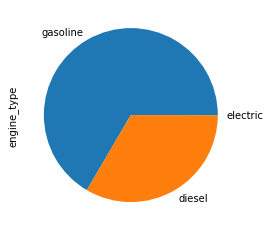

In [7]:
car_df["engine_type"].value_counts().plot.pie()

In [8]:
#scatter plot graphs

In [9]:
y=[]

for i in car_df["price_usd"]:
    if(i<=10000):
        y.append("0-10K")
    elif(i<=20000):
        y.append("10K-20K")
    elif(i<=30000):
        y.append("20K-30K")
    elif(i<=40000):
        y.append("30K-40K")
    elif(i<=50000):
        y.append("40K-50K")

z={
    "Price(USD)":y,
    "Time(Days)":car_df['duration_listed'],
    "Price($)":car_df['price_usd']
}
avgPrice_df = pd.DataFrame(data=z)
avgPrice_df.sort_values(by="Price(USD)", ascending=True, inplace=True)
box_manufacturer = px.scatter(avgPrice_df, x="Price(USD)", y="Time(Days)", color = "Price($)")

box_manufacturer.update_layout(
    width = 475,
    title = 'Price VS Duration Before Car Sold'
)
box_manufacturer.show()


In [10]:
k=[]

for i in car_df["odometer_value"]:
    if(i<=200000):
        k.append("0-200K")
    elif(i<=400000):
        k.append("200K-400K")
    elif(i<=600000):
        k.append("400K-600K")
    elif(i<=800000):
        k.append("600K-800K")
    elif(i<=1000000):
        k.append("800K-1000K")

z={
    "Odometer(Kilometers)":k,
    "Time(Days)":car_df['duration_listed'],
    "Odometer(KM)":car_df['odometer_value']
}
avgPrice_df = pd.DataFrame(data=z)
avgPrice_df.sort_values(by="Odometer(KM)", ascending=True, inplace=True)
box_manufacturer = px.scatter(avgPrice_df, x="Odometer(Kilometers)", y="Time(Days)", color = "Odometer(KM)")

box_manufacturer.update_layout(
    width = 600,
    title = 'Odometer VS Duration Before Car Sold'
)
box_manufacturer.show()


In [11]:
sc_yeardrive = px.scatter(car_df, x="year_produced", y="duration_listed",facet_row="transmission", facet_col="drivetrain", labels={
                             "year_produced":"Year Produced",
                             "duration_listed":"Duration Listed(Days)",
                             "transmission":"Transmission",
                             "drivetrain":"Drivetrain"
                         })

sc_yeardrive.update_layout(
        width=1000,
        title = 'Duration Before Car Sold VS Car Specifications'
)

sc_yeardrive.show()

In [12]:
x = car_df['manufacturer_name'].value_counts()
y=[]
for name in x.index:
    y.append(car_df[car_df["manufacturer_name"] == name]['duration_listed'].mean())
z={
    "Manufacturer Name":x.index,
    "Average Time(Days)":y
}
avgPrice_df = pd.DataFrame(data=z)
avgPrice_df.sort_values(by="Average Time(Days)", ascending=True, inplace=True)
box_manufacturer = px.bar(avgPrice_df, x="Manufacturer Name", y="Average Time(Days)")
box_manufacturer.update_layout(
    title = 'Manufacturer Name VS Average Duration Before Car Sold',
    width=1100
)

box_manufacturer.show()

In [13]:
x = car_df['body_type'].value_counts()
y=[]
for name in x.index:
    y.append(car_df[car_df["body_type"] == name]['duration_listed'].mean())
z={
    "Body Type":x.index,
    "Average Time(Days)":y
}
avgPrice_df = pd.DataFrame(data=z)
#avgPrice_df.sort_values(by="Average Time(Days)", ascending=True, inplace=True)
box_manufacturer = px.bar(avgPrice_df, x="Body Type", y="Average Time(Days)", color="Body Type")
box_manufacturer.update_layout(
    title = 'Body Type VS Average Duration Before Car Sold',
    width=500
)

box_manufacturer.show()

In [14]:
x = car_df['engine_type'].value_counts()
y=[]
for name in x.index:
    y.append(car_df[car_df["engine_type"] == name]['duration_listed'].mean())
z={
    "Engine Type":x.index,
    "Average Time(Days)":y
}
avgPrice_df = pd.DataFrame(data=z)
avgPrice_df.sort_values(by="Average Time(Days)", ascending=True, inplace=True)
box_manufacturer = px.bar(avgPrice_df, x="Engine Type", y="Average Time(Days)")
box_manufacturer.update_layout(
    title = 'Engine Type VS Average Duration Before Car Sold',
    width=500
)

box_manufacturer.show()

In [15]:
x = car_df['color'].value_counts()
y=[]
for name in x.index:
    y.append(car_df[car_df["color"] == name]['duration_listed'].mean())
z={
    "Color":x.index,
    "Average Time(Days)":y
}
avgPrice_df = pd.DataFrame(data=z)
avgPrice_df.sort_values(by="Average Time(Days)", ascending=False, inplace=True)
box_manufacturer = px.bar(avgPrice_df, x="Color", y="Average Time(Days)", color='Color',color_discrete_map={'orange':'orange', 'yellow':'yellow', 'white':'white', 'black':'black', 'violet':'purple', 'silver':'lightslategrey', 'other':'violet',
       'blue':'blue', 'green':'green', 'grey':'grey', 'red':'red', 'brown':'saddlebrown'})
box_manufacturer.update_layout(
    title = 'Color VS Average Duration Before Car Sold',
    width=800
)

box_manufacturer.show()